In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf


In [2]:
gpus = tf.config.list_logical_devices('GPU') 
stg=tf.distribute.MirroredStrategy(gpus)

In [3]:
picture_size = 48
# folder_path = "../input/ckplus/CK+48/" 
# validation_folder_path = "../input/dataset2-modified-copy-2/dataset(2) - modified - Copy 2/images/"
# folder_path = "../input/dataset2-modified-copy-2/dataset(2) - modified - Copy 2/images/" 
# folder_path = "../input/dataset-1-modified/dataset(1) - modified/images/" 
folder_path = "/kaggle/input/emotionv7/facemo/images/" 
# folder_path = "../input/face-expression-recognition-dataset/images/"
# validation_folder_path = "../input/face-expression-recognition-dataset/images/"

In [4]:
from PIL import Image
import cv2
import os

folder_dir = '/kaggle/input/emotionv7/facemo/images/train'
SIZE = 48 # Crop the image to 48x48
DOWNSAMPLE_RATIO = 4 # Downsample the image by a factor of 4

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            image_path = os.path.join(folder_dir, folder, file)
            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, (SIZE, SIZE))
            cv2.imwrite(image_path, img_resized)
        else:
            continue

In [5]:
##expression = 'happy'
##plt.style.use('dark_background')
##plt.figure(figsize= (12,12))
##for i in range(1, 10, 1):
##    plt.subplot(3,3,i)
#     img = load_img(folder_path+"train/"+expression+"/"+
  ##  img = load_img(folder_path+"train/"+expression+"/"+
    ##              os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
##    plt.imshow(img)   
##plt.show()

In [6]:
batch_size  = 32

datagen_train  = ImageDataGenerator(rescale=1./255,
                                    rotation_range=.5,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    fill_mode='nearest')
datagen_val = ImageDataGenerator(rescale=1./255,
                                    rotation_range=.5,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    fill_mode='nearest')

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

Found 2827 images belonging to 5 classes.
Found 797 images belonging to 5 classes.


In [7]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import BatchNormalization


In [8]:
!pip install efficientnet

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from efficientnet.tfkeras import EfficientNetB0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.8 MB/s eta 0:00:00


In [9]:

from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 5

with stg.scope():
    input_shape = (48, 48, 3)
    num_classes = 5

    # Define the EfficientNet model with pre-trained weights
    model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the layers in the base model
    for layer in model.layers:
        layer.trainable = False

    # Add a new output layer for the number of classes
    x = model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = tf.keras.models.Model(inputs=model.input, outputs=x)

    # Compile the model with a learning rate and loss function
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


16818176/16804768 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 24, 24, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 24, 24, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 24, 24, 32)   0           stem_bn[0][0]                    
_____________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
model.fit(train_set,
          steps_per_epoch=len(train_set),
          epochs=20,
          validation_data=test_set,
          validation_steps=len(test_set))

Epoch 1/20
89/89 [==============================] - 25s 130ms/step - loss: 1.3865 - accuracy: 0.4227 - val_loss: 1.2896 - val_accuracy: 0.4969
Epoch 2/20
89/89 [==============================] - 7s 76ms/step - loss: 1.1191 - accuracy: 0.5801 - val_loss: 1.1339 - val_accuracy: 0.5634
Epoch 3/20
89/89 [==============================] - 7s 76ms/step - loss: 1.0003 - accuracy: 0.6541 - val_loss: 1.0461 - val_accuracy: 0.6023
Epoch 4/20
89/89 [==============================] - 7s 77ms/step - loss: 0.9284 - accuracy: 0.6795 - val_loss: 1.0525 - val_accuracy: 0.5935
Epoch 5/20
89/89 [==============================] - 8s 85ms/step - loss: 0.8476 - accuracy: 0.7039 - val_loss: 0.9104 - val_accuracy: 0.6763
Epoch 6/20
89/89 [==============================] - 7s 76ms/step - loss: 0.8066 - accuracy: 0.7262 - val_loss: 0.8767 - val_accuracy: 0.6976
Epoch 7/20
89/89 [==============================] - 7s 79ms/step - loss: 0.7624 - accuracy: 0.7393 - val_loss: 0.9059 - val_accuracy: 0.6550
Epoch 8/20


In [11]:
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

25/25 [==============================] - 2s 73ms/step - loss: 0.6032 - accuracy: 0.8080
Test accuracy: 0.8080301284790039


In [12]:
model.save('/kaggle/working/my_model_emo.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


0 = Angry
1 = Happy
2 = Neutral
3 = Sad
4 = Surprise


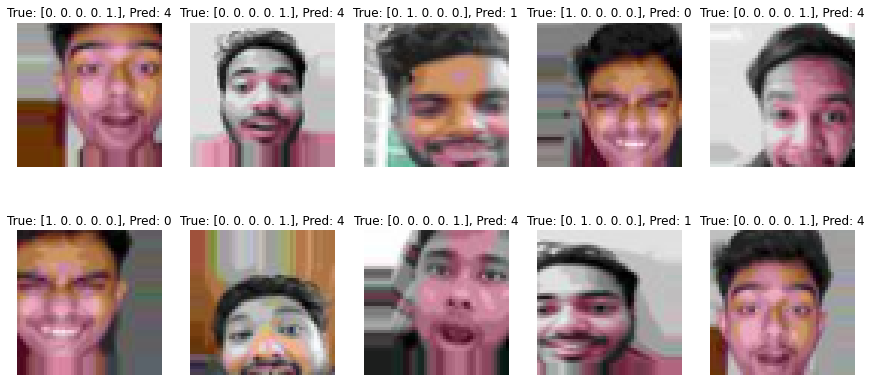

In [13]:
import numpy as np
import matplotlib.pyplot as plt
e = ['Angry','Happy','Neutral','Sad','Surprise']
for i in range(len(e)):
    print(i,"=",e[i])
# Get a batch of 10 random images from the test set
test_batch = test_set.next()
images = test_batch[0][:10]
true_labels = test_batch[1][:10]

# Make predictions using the trained model
pred_probs = model.predict(images)
pred_labels = np.argmax(pred_probs, axis=1)

# Plot the images with their true and predicted labels
fig, axs = plt.subplots(2, 5, figsize=(15, 7))
axs = axs.flatten()

for i in range(len(images)):
    # Rescale the pixel values from [0, 1] to [0, 255] and convert to integers
    img = (images[i] * 255).astype(np.uint8)
    axs[i].imshow(img)
    axs[i].set_title(f'True: {true_labels[i]}, Pred: {pred_labels[i]}')
    axs[i].axis('off')

plt.show()